<a href="https://colab.research.google.com/github/bartiralira/geolocation/blob/main/Introdu%C3%A7%C3%A3o_ao_OSMNX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install matplotlib==3.1.3

In [3]:
!apt-get -qq install -y libspatialindex-dev && !pip install -q -U osmnx

Selecting previously unselected package libspatialindex4v5:amd64.
(Reading database ... 155013 files and directories currently installed.)
Preparing to unpack .../libspatialindex4v5_1.8.5-5_amd64.deb ...
Unpacking libspatialindex4v5:amd64 (1.8.5-5) ...
Selecting previously unselected package libspatialindex-c4v5:amd64.
Preparing to unpack .../libspatialindex-c4v5_1.8.5-5_amd64.deb ...
Unpacking libspatialindex-c4v5:amd64 (1.8.5-5) ...
Selecting previously unselected package libspatialindex-dev:amd64.
Preparing to unpack .../libspatialindex-dev_1.8.5-5_amd64.deb ...
Unpacking libspatialindex-dev:amd64 (1.8.5-5) ...
Setting up libspatialindex4v5:amd64 (1.8.5-5) ...
Setting up libspatialindex-c4v5:amd64 (1.8.5-5) ...
Setting up libspatialindex-dev:amd64 (1.8.5-5) ...
Processing triggers for libc-bin (2.27-3ubuntu1.3) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

     |████████████████████████████████| 93 kB 2.2 MB/s 
  

**Aqui precisa parar e reiniciar o runtime**

Agora com as bibliotecas instaladas é necessários fazer o Restart do Runtime do Google Colab

In [1]:
import osmnx as ox
import networkx as nx

ox.config(use_cache=True, log_console=True)

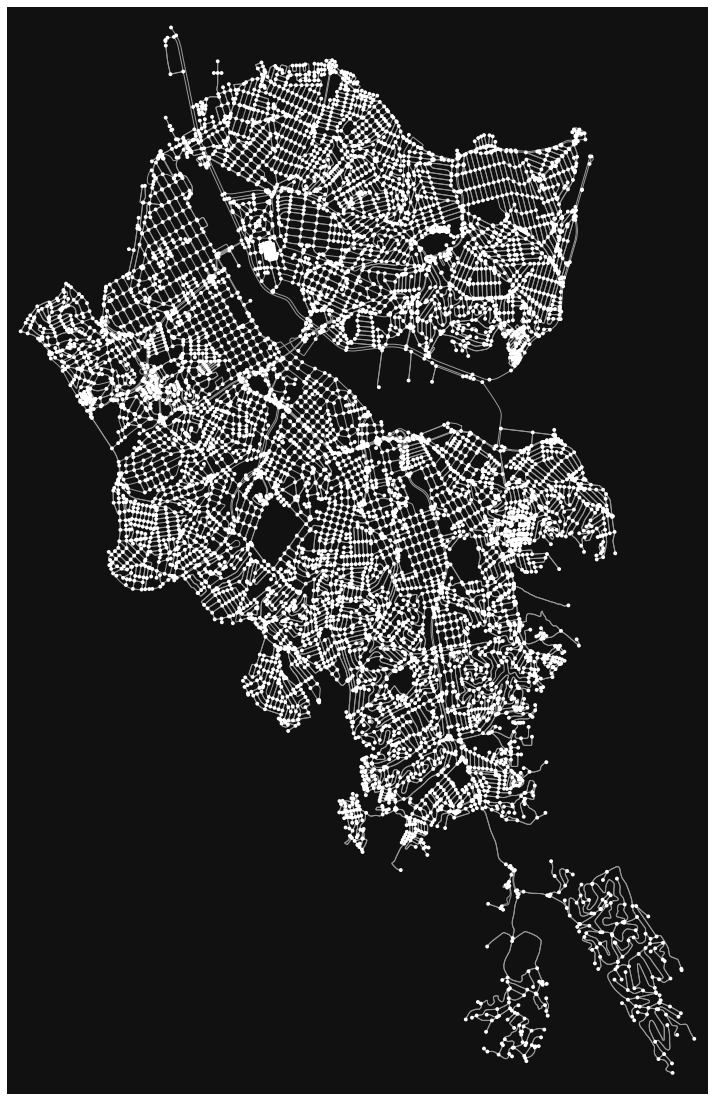

In [2]:
G = ox.graph_from_place('Santo André, Sao Paulo, BR', network_type='drive')
fig, ax = ox.plot_graph(G, figsize=(20, 20))

In [4]:
# impute missing edge speeds then calculate edge travel times
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

In [5]:
# get the nearest network nodes to two lat/lng points
#Felipe's House
orig = ox.get_nearest_node(G, (-23.6495793,-46.5395907))
#Athletic Club Aramaçan
dest = ox.get_nearest_node(G, (-23.6724951,-46.513022))

/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


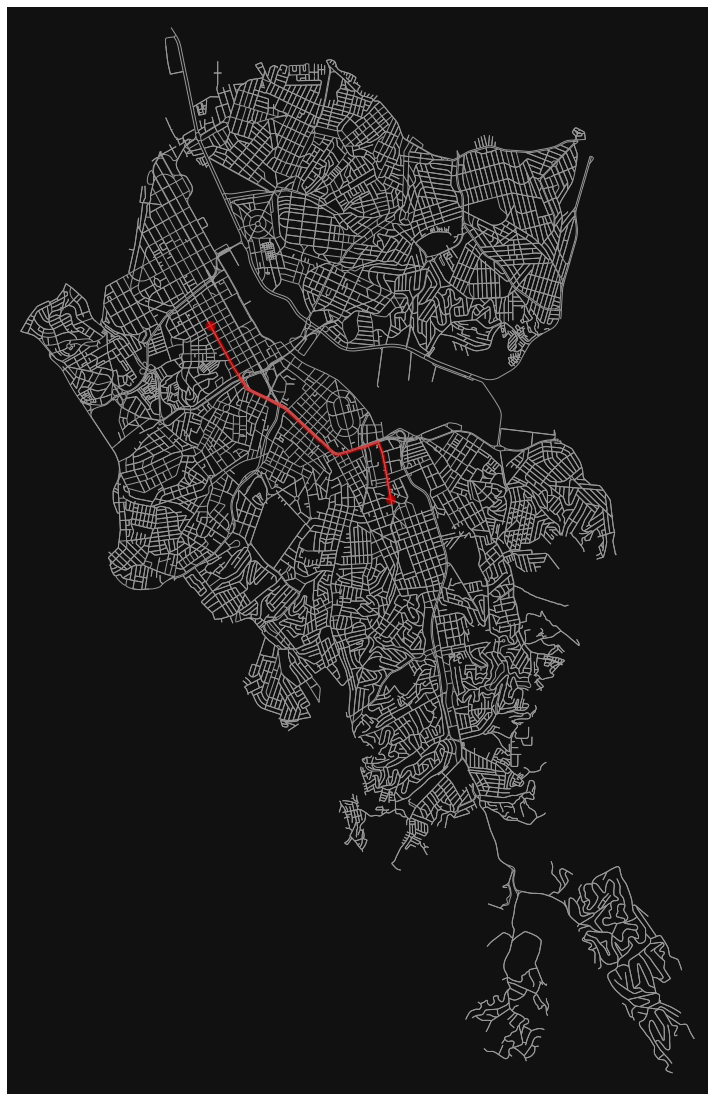

In [6]:
# find the shortest path between these nodes, minimizing travel time, then plot it
route = nx.shortest_path(G, orig, dest, weight='travel_time')
fig, ax = ox.plot_graph_route(G, route, figsize=(20, 20), node_size=0)

In [7]:
#Get Distance of the Route
net_dist = nx.shortest_path_length(G, orig, dest, weight='length', method='dijkstra')
print('Distance in Meters:')
print(net_dist)

Distance in Meters:
4086.6499999999996
